## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()


Instructions for updating:
Colocations handled automatically by placer.


In [5]:
"""
Compile 模型
"""
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='SGD')

In [9]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=20, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 11s 220us/step - loss: 1.2742 - acc: 0.5533 - val_loss: 1.4351 - val_acc: 0.4858
Epoch 2/20
50000/50000 [==============================] - 11s 220us/step - loss: 1.2715 - acc: 0.5542 - val_loss: 1.4113 - val_acc: 0.4945
Epoch 3/20
50000/50000 [==============================] - 11s 224us/step - loss: 1.2644 - acc: 0.5564 - val_loss: 1.4008 - val_acc: 0.4942
Epoch 4/20
50000/50000 [==============================] - 11s 222us/step - loss: 1.2602 - acc: 0.5577 - val_loss: 1.4745 - val_acc: 0.4723
Epoch 5/20
50000/50000 [==============================] - 12s 231us/step - loss: 1.2541 - acc: 0.5614 - val_loss: 1.4268 - val_acc: 0.4868
Epoch 6/20
50000/50000 [==============================] - 12s 245us/step - loss: 1.2424 - acc: 0.5659 - val_loss: 1.4455 - val_acc: 0.4884
Epoch 7/20
50000/50000 [==============================] - 12s 244us/step - loss: 1.2343 - acc: 0.5666 - val_loss: 1.

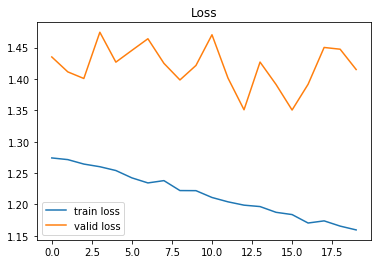

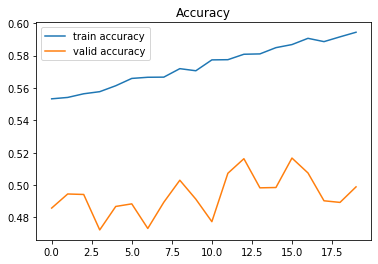

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()